# Depth Map
Using [MiDaS](https://github.com/isl-org/MiDaS) to generate depth maps for creative coding

## 1. Import Libraries

In [1]:
%pip install timm

     -------------------------------------- 510.0/510.0 kB 1.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import torch
import cv2

## 2. Import Model

In [3]:
model_name = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_name)

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to C:\Users\gasma/.cache\torch\hub\master.zip
Downloading: "https://github.com/intel-isl/DPT/releases/download/1_0/dpt_large-midas-2f21e586.pt" to C:\Users\gasma/.cache\torch\hub\checkpoints\dpt_large-midas-2f21e586.pt
100%|██████████| 1.28G/1.28G [14:19<00:00, 1.60MB/s] 


In [8]:
if not torch.cuda.is_available():
    raise Exception(f"Download CUDA to use {model_name}")

device = torch.device("cuda")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
          

In [5]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

Using cache found in C:\Users\gasma/.cache\torch\hub\intel-isl_MiDaS_master


## 3. Making Predictions

Load and display image

In [9]:
img = cv2.imread("input.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

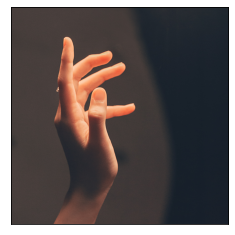

In [13]:
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Apply transformations to image

In [14]:
input = transform(img).to(device)

Make a prediction

In [17]:
with torch.no_grad():
    prediction = midas(input)
    
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size = img.shape[:2],
        mode = "bicubic",
        align_corners = False
    )

    output = prediction.squeeze().cpu().numpy()

Display & save predictions

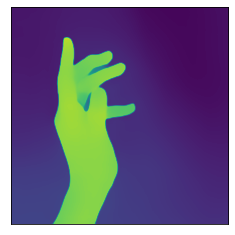

In [18]:
plt.xticks([])
plt.yticks([])
plt.imshow(output)

In [19]:
cv2.imwrite("output.jpg", output)

True